# Phase 4 Project - Time Series Modeling Introduction

### By Rachel Beery

## Overview

### In this project we are using a time series model to understand the patterns of natural disasters declarations in the United States. By understanding these patterns we will then provide recommendations on what natural disasters to prepare for and when they may occur. 

Source: https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2 

In [1]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import pandas.tseries  
import numpy as np  

import statsmodels.api as sm 
import itertools

import matplotlib.pyplot as plt   
from matplotlib.pylab import rcParams 
%matplotlib inline
plt.style.use('ggplot') 
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go 
import seaborn as sns  

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
df = pd.read_csv(r"DisasterDeclarationsSummaries.csv")
df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T04:00:00.000Z,1953,Tornado,TORNADO,0,1,1,1,1953-05-02T04:00:00.000Z,1953-05-02T04:00:00.000Z,1954-06-01T04:00:00.000Z,13,0,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2020-10-05T14:21:20.694Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00.000Z,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15T04:00:00.000Z,1953-05-15T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2020-10-05T14:21:20.696Z,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06T04:00:00.000Z,1953,Flood,FLOODS,0,1,1,1,1953-06-06T04:00:00.000Z,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2020-10-05T14:21:20.698Z,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11T04:00:00.000Z,1953,Tornado,TORNADO,0,1,1,1,1953-06-11T04:00:00.000Z,1953-06-11T04:00:00.000Z,1956-06-01T04:00:00.000Z,25,0,0,Statewide,53009,6bab17e16984fc75f61a8445df3e95d9,2020-10-05T14:21:20.699Z,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11T04:00:00.000Z,1953,Flood,FLOOD,0,1,1,1,1953-06-11T04:00:00.000Z,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,e258e9dd25fac73939f59c8ffb5308f5,2020-10-05T14:21:20.700Z,5f7b2be031a8c6681cfb434e


In [4]:
# How big is this dataset?
df.shape

(60440, 23)

In [5]:
# Looking to make sure out df is the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60440 entries, 0 to 60439
Data columns (total 23 columns):
femaDeclarationString       60440 non-null object
disasterNumber              60440 non-null int64
state                       60440 non-null object
declarationType             60440 non-null object
declarationDate             60440 non-null object
fyDeclared                  60440 non-null int64
incidentType                60440 non-null object
declarationTitle            60440 non-null object
ihProgramDeclared           60440 non-null int64
iaProgramDeclared           60440 non-null int64
paProgramDeclared           60440 non-null int64
hmProgramDeclared           60440 non-null int64
incidentBeginDate           60440 non-null object
incidentEndDate             52339 non-null object
disasterCloseoutDate        43789 non-null object
fipsStateCode               60440 non-null int64
fipsCountyCode              60440 non-null int64
placeCode                   60440 non-null int64


In [6]:
df.describe()

,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber
count,60440.000,60440.000,60440.000,60440.000,60440.000,60440.000,60440.000,60440.000,60440.000,60440.000
mean,2474.543,2003.302,0.165,0.284,0.932,0.354,31.534,97.294,96489.649,35849.570
std,1376.038,14.591,0.372,0.451,0.252,0.478,16.601,102.835,13747.325,35830.568
min,1.000,1953.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,3.000
25%,1249.000,1996.000,0.000,0.000,1.000,0.000,19.000,31.000,99029.000,8099.000
50%,2704.500,2005.000,0.000,0.000,1.000,0.000,30.000,75.000,99073.000,19026.000
75%,3458.000,2016.000,0.000,1.000,1.000,1.000,46.000,127.000,99123.000,76022.000
max,5383.000,2021.000,1.000,1.000,1.000,1.000,78.000,840.000,99507.000,99159.000


In [7]:
# Do we have nulls?
df.isna().sum()

femaDeclarationString           0
disasterNumber                  0
state                           0
declarationType                 0
declarationDate                 0
fyDeclared                      0
incidentType                    0
declarationTitle                0
ihProgramDeclared               0
iaProgramDeclared               0
paProgramDeclared               0
hmProgramDeclared               0
incidentBeginDate               0
incidentEndDate              8101
disasterCloseoutDate        16651
fipsStateCode                   0
fipsCountyCode                  0
placeCode                       0
designatedArea                  0
declarationRequestNumber        0
hash                            0
lastRefresh                     0
id                              0
dtype: int64

In [8]:
# Do we have any duplicate rows?
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()
# None

0


,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id


In [9]:
# Clean the nulls
# incidentEndDate and disasterCloseoutDate are the only values with nulls

(10, -0.5)

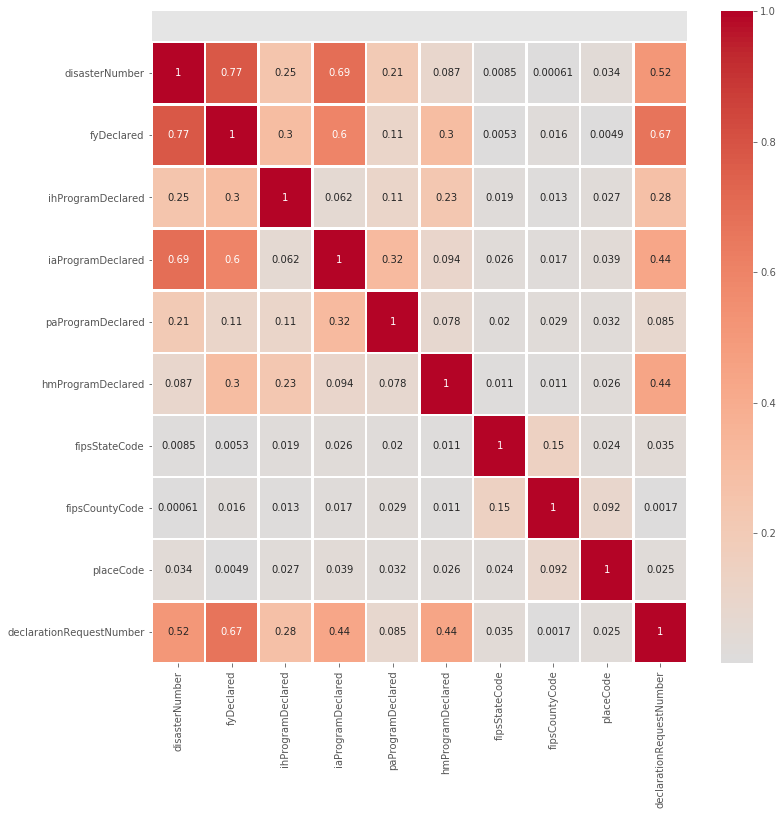

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=1.5, cmap='coolwarm');
ax.set_ylim(len(df.corr())-0, -0.5)

# Scrub

In [11]:
df['femaDeclarationString'].value_counts()

DR-4522-ME    437
EM-3458-TX    257
DR-4485-TX    257
DR-1239-TX    257
EM-3261-TX    255
             ... 
FM-2028-CA      1
EM-3388-FL      1
FM-2223-TX      1
FM-2322-TX      1
FM-5315-AZ      1
Name: femaDeclarationString, Length: 4497, dtype: int64

In [12]:
df['disasterNumber'].value_counts()

4522    437
3458    257
4485    257
1239    257
3261    255
       ... 
2993      1
5010      1
2961      1
2929      1
2049      1
Name: disasterNumber, Length: 4497, dtype: int64

In [13]:
df['state'].value_counts()

TX    4651
MO    2670
VA    2460
KY    2416
OK    2278
GA    2239
LA    2131
FL    2027
NC    1965
PR    1825
IA    1823
MS    1691
KS    1682
AL    1619
AR    1588
TN    1522
MN    1498
IN    1451
CA    1443
NE    1423
NY    1421
ND    1301
OH    1281
IL    1268
SD    1251
PA    1226
WV    1218
ME    1004
WI     891
WA     862
SC     855
MI     791
CO     642
MT     586
NJ     567
OR     562
NM     495
MD     445
MA     389
ID     346
AZ     323
VT     314
NH     294
NV     271
AK     247
UT     241
CT     228
WY     128
RI     102
HI      95
VI      79
AS      75
MP      62
MH      53
DE      52
FM      31
DC      22
GU      19
PW       1
Name: state, dtype: int64

In [14]:
df['declarationType'].value_counts()

DR    40964
EM    17696
FM     1780
Name: declarationType, dtype: int64

In [15]:
df['declarationDate'].value_counts()

2020-03-13T20:00:00.000Z    2876
2020-03-13T19:00:00.000Z     566
1996-01-13T05:00:00.000Z     453
2020-04-04T17:15:00.000Z     437
2005-09-13T17:34:00.000Z     433
                            ... 
1958-05-15T04:00:00.000Z       1
1956-04-24T05:00:00.000Z       1
2008-03-21T16:10:00.000Z       1
2018-05-11T20:27:00.000Z       1
2009-04-24T00:21:00.000Z       1
Name: declarationDate, Length: 3849, dtype: int64

In [16]:
df['declarationDate'] = df['declarationDate'].str.split('T').str[0]

In [17]:
df['declarationDate'].value_counts()

2020-03-13    3683
2005-09-11     777
2020-04-04     738
2005-09-05     646
2005-09-13     615
              ... 
2003-09-27       1
2004-06-19       1
2019-03-05       1
1979-07-25       1
2003-09-29       1
Name: declarationDate, Length: 3118, dtype: int64

In [18]:
df['declarationDate'] = pd.to_datetime(df['declarationDate'])

In [19]:
# df['Declaration Day of Week'] = df['declarationDate'].dt.day_name()

In [20]:
#df['Declaration Year'] = df['declarationDate'].dt.year
#df['Declaration Month'] = df['declarationDate'].dt.month
#df['Declaration Day'] = df['declarationDate'].dt.day

In [21]:
#df = df.drop(columns=['declarationDate'], axis=1)

In [22]:
df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-1-GA,1,GA,DR,1953-05-02,1953,Tornado,TORNADO,0,1,1,1,1953-05-02T04:00:00.000Z,1953-05-02T04:00:00.000Z,1954-06-01T04:00:00.000Z,13,0,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2020-10-05T14:21:20.694Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15T04:00:00.000Z,1953-05-15T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2020-10-05T14:21:20.696Z,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,1,1,1953-06-06T04:00:00.000Z,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2020-10-05T14:21:20.698Z,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11,1953,Tornado,TORNADO,0,1,1,1,1953-06-11T04:00:00.000Z,1953-06-11T04:00:00.000Z,1956-06-01T04:00:00.000Z,25,0,0,Statewide,53009,6bab17e16984fc75f61a8445df3e95d9,2020-10-05T14:21:20.699Z,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,1,1,1953-06-11T04:00:00.000Z,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,e258e9dd25fac73939f59c8ffb5308f5,2020-10-05T14:21:20.700Z,5f7b2be031a8c6681cfb434e


In [23]:
df['fyDeclared'].value_counts()

2020    9243
2005    4661
2011    2684
2008    2456
2019    1902
        ... 
1960      13
1961      11
1953      10
1959       7
1958       6
Name: fyDeclared, Length: 69, dtype: int64

In [24]:
df['incidentType'].value_counts()

Severe Storm(s)     16957
Hurricane           11890
Flood               10389
Biological           7611
Snow                 3659
Fire                 3488
Severe Ice Storm     1990
Tornado              1464
Drought              1292
Coastal Storm         570
Freezing              301
Other                 297
Earthquake            226
Typhoon               130
Volcano                51
Fishing Losses         42
Mud/Landslide          31
Dam/Levee Break        13
Tsunami                 9
Chemical                9
Toxic Substances        9
Human Cause             7
Terrorist               5
Name: incidentType, dtype: int64

In [25]:
df['declarationTitle'].value_counts()

COVID-19 PANDEMIC               3928
SEVERE STORMS AND FLOODING      3810
COVID-19                        3683
SEVERE STORMS & FLOODING        3387
HURRICANE KATRINA EVACUATION    2602
                                ... 
SKIRBALL FIRE                      1
LITTLE LEWIS FIRE                  1
CROSSROADS FIRE                    1
STAGEBARN CANYON FIRE              1
BOBCAT GULCH FIRE                  1
Name: declarationTitle, Length: 2136, dtype: int64

In [26]:
# We can combine COVID into one category as it's listed as two different categories
df['declarationTitle'].replace('COVID-19', 'COVID-19 PANDEMIC', inplace=True)
df['declarationTitle'].replace('SEVERE STORMS & FLOODING', 'SEVERE STORMS AND FLOODING', inplace=True)
df['declarationTitle'].value_counts()

COVID-19 PANDEMIC                         7611
SEVERE STORMS AND FLOODING                7197
HURRICANE KATRINA EVACUATION              2602
SEVERE WINTER STORM                       1935
SEVERE STORMS, TORNADOES, AND FLOODING    1849
                                          ... 
265TH WEST FIRE                              1
HUGHES COUNTY FIRE COMPLEX                   1
OSHA CANYON COMPLEX  (COLFAX)                1
LEHIGH ACRES (ANNA AVE. N.) FIRE             1
CA - SAWMILL FIRE - 06-27-2003               1
Name: declarationTitle, Length: 2134, dtype: int64

In [27]:
#df = df.set_index("declarationTitle")
#df= df.drop('COVID-19 PANDEMIC', axis=0)

In [28]:
df['ihProgramDeclared'].value_counts()

0    50440
1    10000
Name: ihProgramDeclared, dtype: int64

In [29]:
df['iaProgramDeclared'].value_counts()

0    43253
1    17187
Name: iaProgramDeclared, dtype: int64

In [30]:
df['paProgramDeclared'].value_counts()

1    56309
0     4131
Name: paProgramDeclared, dtype: int64

In [31]:
df['hmProgramDeclared'].value_counts()

0    39029
1    21411
Name: hmProgramDeclared, dtype: int64

In [32]:
df['incidentBeginDate'].value_counts()

2020-01-20T19:00:00.000Z    7310
2005-08-29T04:00:00.000Z    1959
1993-03-13T05:00:00.000Z     771
1996-01-06T05:00:00.000Z     415
2005-11-27T05:00:00.000Z     380
                            ... 
1956-04-21T05:00:00.000Z       1
2015-05-08T04:00:00.000Z       1
2013-07-18T04:00:00.000Z       1
2012-06-23T04:01:00.000Z       1
2008-02-08T05:00:00.000Z       1
Name: incidentBeginDate, Length: 3364, dtype: int64

In [33]:
df['incidentBeginDate'] = df['incidentBeginDate'].str.split('T').str[0]

In [34]:
#df['incidentBeginDate'] = pd.to_datetime(df['incidentBeginDate'])

In [35]:
#df['Begin Day of Week'] = df['incidentBeginDate'].dt.day_name()

In [36]:
#df['Begin Incident Year'] = df['incidentBeginDate'].dt.year
#df['Begin Incident Month'] = df['incidentBeginDate'].dt.month
#df['Begin Incident Day'] = df['incidentBeginDate'].dt.day

In [37]:
#df = df.drop(columns=['incidentBeginDate'], axis=1)
#df.head()

In [38]:
df['incidentEndDate'].value_counts()

2005-10-01T12:55:00.000Z    2926
1993-03-17T05:00:00.000Z     635
1996-01-12T05:00:00.000Z     555
2017-09-21T03:59:00.000Z     321
2012-11-08T05:00:00.000Z     307
                            ... 
2006-09-03T22:00:00.000Z       1
1988-01-02T05:00:00.000Z       1
1973-09-04T04:00:00.000Z       1
2004-05-09T01:00:00.000Z       1
1955-12-23T05:00:00.000Z       1
Name: incidentEndDate, Length: 3174, dtype: int64

In [39]:
#df['incidentEndDate'] = df['incidentEndDate'].str.split('T').str[0]

In [40]:
#df['incidentEndDate'] = pd.to_datetime(df['incidentEndDate'])

In [41]:
#df['Incident End Day of Week'] = df['incidentEndDate'].dt.day_name()

In [42]:
#df['Incident End Year'] = df['incidentEndDate'].dt.year
#df['Incident End Month'] = df['incidentEndDate'].dt.month
#df['Incident End Day'] = df['incidentEndDate'].dt.day

In [43]:
#df = df.drop(columns=['incidentEndDate'], axis=1)
df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-1-GA,1,GA,DR,1953-05-02,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02T04:00:00.000Z,1954-06-01T04:00:00.000Z,13,0,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2020-10-05T14:21:20.694Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2020-10-05T14:21:20.696Z,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2020-10-05T14:21:20.698Z,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11,1953,Tornado,TORNADO,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1956-06-01T04:00:00.000Z,25,0,0,Statewide,53009,6bab17e16984fc75f61a8445df3e95d9,2020-10-05T14:21:20.699Z,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,e258e9dd25fac73939f59c8ffb5308f5,2020-10-05T14:21:20.700Z,5f7b2be031a8c6681cfb434e


In [44]:
df['disasterCloseoutDate'].value_counts()

2020-04-22T03:59:00.000Z    674
2017-12-19T04:59:00.000Z    430
1994-06-30T04:00:00.000Z    410
1978-07-03T04:00:00.000Z    393
2001-09-18T04:00:00.000Z    390
                           ... 
1998-12-07T05:00:00.000Z      1
1956-05-01T04:00:00.000Z      1
2016-04-08T03:59:00.000Z      1
2005-08-17T04:00:00.000Z      1
2015-05-01T03:59:00.000Z      1
Name: disasterCloseoutDate, Length: 1755, dtype: int64

In [45]:
#df['disasterCloseoutDate'] = df['disasterCloseoutDate'].str.split('T').str[0]

In [46]:
#df['disasterCloseoutDate'] = pd.to_datetime(df['disasterCloseoutDate'])

In [47]:
#df['Disaster Close Day of Week'] = df['disasterCloseoutDate'].dt.day_name()

In [48]:
#df['Disaster Close Year'] = df['disasterCloseoutDate'].dt.year
#df['Disaster Close Month'] = df['disasterCloseoutDate'].dt.month
#df['Disaster Close Day'] = df['disasterCloseoutDate'].dt.day

In [49]:
#df = df.drop(columns=['disasterCloseoutDate'], axis=1)
df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-1-GA,1,GA,DR,1953-05-02,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02T04:00:00.000Z,1954-06-01T04:00:00.000Z,13,0,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2020-10-05T14:21:20.694Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2020-10-05T14:21:20.696Z,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2020-10-05T14:21:20.698Z,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11,1953,Tornado,TORNADO,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1956-06-01T04:00:00.000Z,25,0,0,Statewide,53009,6bab17e16984fc75f61a8445df3e95d9,2020-10-05T14:21:20.699Z,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,e258e9dd25fac73939f59c8ffb5308f5,2020-10-05T14:21:20.700Z,5f7b2be031a8c6681cfb434e


In [50]:
df['fipsStateCode'].value_counts()

48    4651
29    2670
51    2460
21    2416
40    2278
13    2239
22    2131
12    2027
37    1965
72    1825
19    1823
28    1691
20    1682
1     1619
5     1588
47    1522
27    1498
18    1451
6     1443
31    1423
36    1421
38    1301
39    1281
17    1268
46    1251
42    1226
54    1218
23    1004
55     891
53     862
45     855
26     791
8      642
30     586
34     567
41     562
35     495
24     445
25     389
16     346
4      323
50     314
33     294
32     271
2      247
49     241
9      228
56     128
44     102
15      95
78      79
60      75
69      62
68      53
10      52
64      31
11      22
66      19
70       1
Name: fipsStateCode, dtype: int64

In [51]:
df['fipsCountyCode'].value_counts()

0      1333
3       994
5       962
7       949
9       933
       ... 
390       2
230       1
400       1
80        1
330       1
Name: fipsCountyCode, Length: 345, dtype: int64

In [52]:
df['placeCode'].value_counts()

99005    937
99009    917
99001    913
99007    896
99015    885
        ... 
72200      1
99400      1
99080      1
56240      1
48440      1
Name: placeCode, Length: 1109, dtype: int64

In [53]:
df['designatedArea'].value_counts()

Washington (County)             517
Jefferson (County)              471
Statewide                       465
Jackson (County)                455
Franklin (County)               445
                               ... 
T09 SD                            1
TB R11 WELS                       1
La Jolla Indian Reservation       1
T07 R13 WELS                      1
Aleutians West (Census Area)      1
Name: designatedArea, Length: 2769, dtype: int64

In [54]:
df['declarationRequestNumber'].value_counts()

20130    437
98062    257
20061    257
20080    257
5137     255
        ... 
8115       1
6066       1
6034       1
98175      1
2049       1
Name: declarationRequestNumber, Length: 4497, dtype: int64

In [55]:
df['hash'].value_counts()

7414805f6fe56a735afdcab33276d55d    1
d47c0b7af54722cc24ad71d7c6acd3cd    1
32e0042b40dd3b444d112886a664c8e3    1
ff960ae3c66be739568deab800e389ee    1
37b02f18228eafc5bcd6105f6ed94652    1
                                   ..
2f2f325e8fe9cd49e7f72eb3160591db    1
713ae68c4d82ffb9c494cf0b7052cbfd    1
fc72beb73f169b9fa895d69db317087f    1
82df5c7519914b69034c0cf134e0159e    1
61caa7d757c96df20191ffe7c2264bdf    1
Name: hash, Length: 60440, dtype: int64

In [56]:
df = df.drop(columns=['hash'], axis=1)
df

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastRefresh,id
0,DR-1-GA,1,GA,DR,1953-05-02,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02T04:00:00.000Z,1954-06-01T04:00:00.000Z,13,0,0,Statewide,53013,2020-10-05T14:21:20.694Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53003,2020-10-05T14:21:20.696Z,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,2020-10-05T14:21:20.698Z,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11,1953,Tornado,TORNADO,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1956-06-01T04:00:00.000Z,25,0,0,Statewide,53009,2020-10-05T14:21:20.699Z,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,2020-10-05T14:21:20.700Z,5f7b2be031a8c6681cfb434e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60435,FM-5382-NV,5382,NV,FM,2020-11-18,2021,Fire,PINEHAVEN FIRE,0,0,1,1,2020-11-17,NaN,NaN,32,31,99031,Washoe (County),20323,2020-11-19T16:42:40.333Z,5fb6a0800eb5d36238b4d770
60436,DR-4569-CA,4569,CA,DR,2020-10-17,2021,Fire,WILDFIRES,0,0,1,1,2020-09-04,2020-11-18T04:00:00.000Z,NaN,6,15,99015,Del Norte (County),20302,2020-11-25T20:42:27.057Z,5fbec1b30eb5d36238660eac
60437,DR-4569-CA,4569,CA,DR,2020-10-17,2021,Fire,WILDFIRES,0,0,1,1,2020-09-04,2020-11-18T04:00:00.000Z,NaN,6,115,99115,Yuba (County),20302,2020-11-25T20:42:27.058Z,5fbec1b30eb5d36238660ebd
60438,DR-4566-DE,4566,DE,DR,2020-10-02,2021,Hurricane,TROPICAL STORM ISAIAS,0,0,1,1,2020-08-05,2020-08-08T03:59:00.000Z,NaN,10,3,99003,New Castle (County),20253,2020-12-02T21:41:43.367Z,5fc80a170eb5d36238431c13


In [57]:
# This column is just showing us when the data was last refreshed so we can drop
df['lastRefresh'].value_counts()

2020-10-05T14:21:20.707Z    6
2020-10-05T14:21:20.705Z    6
2020-10-05T14:21:20.703Z    5
2020-10-05T14:21:20.709Z    5
2020-10-05T14:21:20.708Z    5
                           ..
2020-10-05T14:21:35.146Z    1
2020-10-05T14:21:39.134Z    1
2020-10-05T14:22:14.483Z    1
2020-10-05T14:22:38.250Z    1
2020-10-05T14:22:10.096Z    1
Name: lastRefresh, Length: 51842, dtype: int64

In [58]:
df = df.drop(columns=['lastRefresh'], axis=1)
df

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,id
0,DR-1-GA,1,GA,DR,1953-05-02,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02T04:00:00.000Z,1954-06-01T04:00:00.000Z,13,0,0,Statewide,53013,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53003,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11,1953,Tornado,TORNADO,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1956-06-01T04:00:00.000Z,25,0,0,Statewide,53009,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,5f7b2be031a8c6681cfb434e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60435,FM-5382-NV,5382,NV,FM,2020-11-18,2021,Fire,PINEHAVEN FIRE,0,0,1,1,2020-11-17,NaN,NaN,32,31,99031,Washoe (County),20323,5fb6a0800eb5d36238b4d770
60436,DR-4569-CA,4569,CA,DR,2020-10-17,2021,Fire,WILDFIRES,0,0,1,1,2020-09-04,2020-11-18T04:00:00.000Z,NaN,6,15,99015,Del Norte (County),20302,5fbec1b30eb5d36238660eac
60437,DR-4569-CA,4569,CA,DR,2020-10-17,2021,Fire,WILDFIRES,0,0,1,1,2020-09-04,2020-11-18T04:00:00.000Z,NaN,6,115,99115,Yuba (County),20302,5fbec1b30eb5d36238660ebd
60438,DR-4566-DE,4566,DE,DR,2020-10-02,2021,Hurricane,TROPICAL STORM ISAIAS,0,0,1,1,2020-08-05,2020-08-08T03:59:00.000Z,NaN,10,3,99003,New Castle (County),20253,5fc80a170eb5d36238431c13


In [59]:
df['id'].value_counts()

5f7b2bfd31a8c6681cfcbe32    1
5f7b2c2b31a8c6681cffa2df    1
5f7b2c0731a8c6681cfd5b69    1
5f7b2c2531a8c6681cff40c2    1
5f7b2bfb31a8c6681cfca147    1
                           ..
5f7b2bf431a8c6681cfc3e49    1
5f7b2c2631a8c6681cff577b    1
5f7b2bec31a8c6681cfbd10d    1
5f7b2c2031a8c6681cfeeff3    1
5f7b2c2731a8c6681cff6049    1
Name: id, Length: 60440, dtype: int64

# Data Preparation (Preparing for Modeling)

In [60]:
# Finding the top 3 Natural Disasters
# We will make vizualizations of these
natdisasters = list(df['incidentType'].value_counts().head(3).index)
natdisasters

['Severe Storm(s)', 'Hurricane', 'Flood']

In [61]:
df = df[df['incidentType'].isin(natdisasters)]
df['incidentType'].value_counts()

Severe Storm(s)    16957
Hurricane          11890
Flood              10389
Name: incidentType, dtype: int64

In [62]:
df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,id
2,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,5f7b2be031a8c6681cfb4348
4,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,5f7b2be031a8c6681cfb434e
5,DR-9-TX,9,TX,DR,1953-06-19,1953,Flood,FLOOD,0,1,1,1,1953-06-19,1953-06-19T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53010,5f7b2be031a8c6681cfb4351
6,DR-3-LA,3,LA,DR,1953-05-29,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29T04:00:00.000Z,1960-02-01T05:00:00.000Z,22,0,0,Statewide,53005,5f7b2be031a8c6681cfb4354
10,DR-12-FL,12,FL,DR,1953-10-22,1954,Flood,FLOOD,0,1,1,1,1953-10-22,1953-10-22T05:00:00.000Z,1956-05-01T04:00:00.000Z,12,0,0,Statewide,53015,5f7b2be031a8c6681cfb4360


In [63]:
severestorm = list(df['incidentType'].value_counts().head(1).index)
severestorm

['Severe Storm(s)']

In [64]:
# Make Date the index 
df['date'] = pd.to_datetime(df['declarationDate'])
df.set_index('date', inplace=True)
df

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,id
date,,,,,,,,,,,,,,,,,,,,,
1953-06-06,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06T04:00:00.000Z,1955-12-01T05:00:00.000Z,30,0,0,Statewide,53006,5f7b2be031a8c6681cfb4348
1953-06-11,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11T04:00:00.000Z,1955-11-01T05:00:00.000Z,19,0,0,Statewide,53008,5f7b2be031a8c6681cfb434e
1953-06-19,DR-9-TX,9,TX,DR,1953-06-19,1953,Flood,FLOOD,0,1,1,1,1953-06-19,1953-06-19T04:00:00.000Z,1958-01-01T05:00:00.000Z,48,0,0,Statewide,53010,5f7b2be031a8c6681cfb4351
1953-05-29,DR-3-LA,3,LA,DR,1953-05-29,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29T04:00:00.000Z,1960-02-01T05:00:00.000Z,22,0,0,Statewide,53005,5f7b2be031a8c6681cfb4354
1953-10-22,DR-12-FL,12,FL,DR,1953-10-22,1954,Flood,FLOOD,0,1,1,1,1953-10-22,1953-10-22T05:00:00.000Z,1956-05-01T04:00:00.000Z,12,0,0,Statewide,53015,5f7b2be031a8c6681cfb4360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,EM-3551-FL,3551,FL,EM,2020-11-11,2021,Hurricane,HURRICANE ETA,0,0,1,0,2020-11-07,NaN,NaN,12,115,99115,Sarasota (County),20321,5fac7b670eb5d362384af402
2020-11-11,EM-3551-FL,3551,FL,EM,2020-11-11,2021,Hurricane,HURRICANE ETA,0,0,1,0,2020-11-07,NaN,NaN,12,83,99083,Marion (County),20321,5fac7b670eb5d362384af3a0
2020-11-11,EM-3551-FL,3551,FL,EM,2020-11-11,2021,Hurricane,HURRICANE ETA,0,0,1,0,2020-11-07,NaN,NaN,12,119,99119,Sumter (County),20321,5fac7b670eb5d362384af407


In [65]:
# The 'MS' string groups the data in buckets by start of the month
df.groupby(['incidentType']).resample('MS').count()['id']

incidentType     date      
Flood            1953-05-01     1
                 1953-06-01     3
                 1953-07-01     0
                 1953-08-01     0
                 1953-09-01     0
                               ..
Severe Storm(s)  2020-06-01     0
                 2020-07-01    68
                 2020-08-01    23
                 2020-09-01     1
                 2020-10-01     6
Name: id, Length: 2381, dtype: int64

In [66]:
freq = 'MS'

In [67]:
pd.date_range(start='1970-01-01', end='2020-01-01')

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=18263, freq='D')

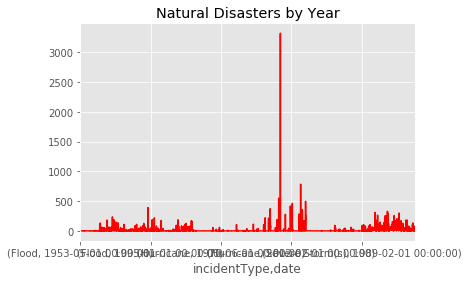

In [68]:
ts_natdisasters = df.groupby(['incidentType']).resample(freq).count()['id']
ts_natdisasters.plot.line(color='red')
plt.title('Natural Disasters by Year')
plt.savefig('natdisasters-by-year')
plt.show()

In [69]:
natdisasters

['Severe Storm(s)', 'Hurricane', 'Flood']

In [70]:
#natdisasters.drop('Biological')

In [71]:
# Severe Storm(s)

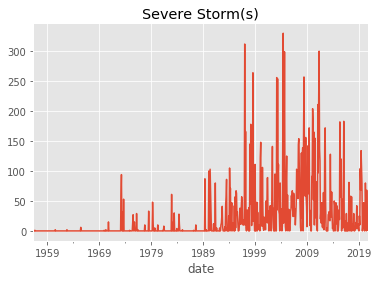

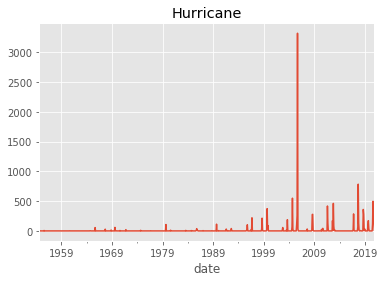

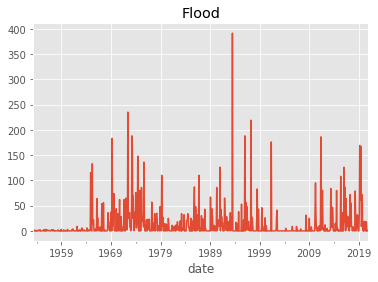

In [72]:
sstorms = {}
for disaster in natdisasters:
    ts = ts_natdisasters[disaster].asfreq(freq).rename(disaster)
    plt.figure()
    ts.plot(title=disaster)
    sstorms[disaster] = ts

In [73]:
df = pd.DataFrame(sstorms) 
df

,Severe Storm(s),Hurricane,Flood
date,,,
1953-05-01,nan,nan,1
1953-06-01,nan,nan,3
1953-07-01,nan,nan,0
1953-08-01,nan,nan,0
1953-09-01,nan,nan,0
...,...,...,...
2020-07-01,68.000,117.000,18
2020-08-01,23.000,497.000,0
2020-09-01,1.000,201.000,0


In [74]:
#sstorms = sstorms.drop(['Biological']) 

In [75]:
df.fillna(0, inplace=True)

In [76]:
df.index

DatetimeIndex(['1953-05-01', '1953-06-01', '1953-07-01', '1953-08-01',
               '1953-09-01', '1953-10-01', '1953-11-01', '1953-12-01',
               '1954-01-01', '1954-02-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='date', length=811, freq='MS')

In [77]:
df = df.loc['1970-01-01':'2020-01-01']

# Vizualizations for Non-Technical Audience

In [78]:
#df['Fire']

In [79]:
# Look at Lab for sampling
# MS or ME

In [80]:
## Making into df after running for loop
## Rewatching office hours video - forcasting
## Deleting biological
## Specific periods of time of year

In [81]:
# sstorms = df[df['incidentType'] == 'Severe Storm(s)']
# sstorms

In [82]:
#ts_sstorms = sstorms.resample('A').count()['id']
#ts_sstorms.plot.line(color='red')
##plt.savefig('severestorms-by-year')
#plt.show()

In [83]:
#hurricanes = df[df['incidentType'] =='Hurricane']
#hurricanes

In [84]:
#hurricanes.nunique()

In [85]:
#ts_hurricanes = hurricanes.resample('A').count()['id']
#ts_hurricanes.plot.line(color='purple')
#plt.title('Hurricanes by Year')
#plt.savefig('hurricanes-by-year')
#plt.show()

In [86]:
# Plotting the cumulation of hurricanes
#ts_hurricanes.cumsum().plot()

In [87]:
# Flood

In [88]:
#floods = df[df['incidentType'] =='Flood']
#floods

In [89]:
#ts_flood = floods.resample('A').count()['id']
#ts_flood.plot.line(color='blue')
#plt.title('Floods by Year')
#plt.savefig('floods-by-year')
#plt.show()

In [90]:
# Biological

In [91]:
#Biological = df[df['incidentType'] =='Biological']
#Biological

In [92]:
#ts_Biological = Biological.resample('MS').count()['id']
#ts_Biological.plot.line(color='orange')
#plt.title('Biological by Year')
#plt.savefig('Biological-by-year')
#plt.show()

In [93]:
# Bio is COVID
# Not include in this model

In [94]:
# Snow

In [95]:
#Snow = df[df['incidentType'] =='Snow']
#Snow

In [96]:
#ts_Snow = Snow.resample('A').count()['id']
#ts_Snow.plot.line(color='orange')
#plt.title('Snow by Year')
#plt.savefig('Snow-by-year')
#plt.show()

In [97]:
#'Fire'

In [98]:
#Fire = df[df['incidentType'] =='Fire']
#Fire

In [99]:
#ts_Fire = Fire.resample('A').count()['id']
#ts_Fire.plot.line(color='red')
#plt.title('Fire by Year')
#plt.savefig('Fire-by-year')
#plt.show()

In [100]:
#'Severe Ice Storm'

In [101]:
#Ice = df[df['incidentType'] =='Severe Ice Storm']
#Ice

In [102]:
#ts_Ice = Ice.resample('A').count()['id']
#ts_Ice.plot.line(color='blue')
#plt.title('Ice by Year')
#plt.savefig('Ice-by-year')
#plt.show()

In [103]:
#'Tornado'

In [104]:
#Tornado = df[df['incidentType'] =='Tornado']
#Tornado

In [105]:
#ts_Tornado = Tornado.resample('A').count()['id']
#ts_Tornado.plot.line(color='orange')
#plt.title('Tornado by Year')
#plt.savefig('Tornado-by-year')
#plt.show()

# Preparations for Modeling

In [106]:
# One of the most common methods used in time series forecasting is known as the ARIMA model, 
# which stands for AutoregRessive Integrated Moving Average. 
# ARIMA is a model that can be fitted to time series data in order to 
# better understand or predict future points in the series.

In [107]:
# Defining (p,d,q)
# p = auto-regressive part of model. Incorporates the effect of past values into our model.
# d = Integrated component of an ARIMA model. Concerned with the amount of differencing 
# as it identifies the number of lag values to subtract from the current observation.  
# q = Moving average part of the model. Used to set the error of the model as a 
# linear combination of the error values observed at previous time point in the past.
# ARIMA(p,d,q) = seasonality, trend, and noise in datasets

In [108]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [109]:
df

,Severe Storm(s),Hurricane,Flood
date,,,
1970-01-01,0.000,0.000,0
1970-02-01,0.000,0.000,44
1970-03-01,0.000,0.000,0
1970-04-01,2.000,0.000,0
1970-05-01,0.000,0.000,0
...,...,...,...
2019-09-01,0.000,172.000,72
2019-10-01,8.000,42.000,7
2019-11-01,25.000,0.000,0


In [110]:
df.to_csv('Model_df.csv')

In [111]:
ts_natdisasters = df['Severe Storm(s)']
ts_natdisasters

date
1970-01-01    0.000
1970-02-01    0.000
1970-03-01    0.000
1970-04-01    2.000
1970-05-01    0.000
              ...  
2019-09-01    0.000
2019-10-01    8.000
2019-11-01   25.000
2019-12-01   47.000
2020-01-01    8.000
Freq: MS, Name: Severe Storm(s), Length: 601, dtype: float64

In [112]:
# Time Series for Hurricanes
ts_hurricane = df['Hurricane']
ts_hurricane

date
1970-01-01     0.000
1970-02-01     0.000
1970-03-01     0.000
1970-04-01     0.000
1970-05-01     0.000
               ...  
2019-09-01   172.000
2019-10-01    42.000
2019-11-01     0.000
2019-12-01     0.000
2020-01-01     0.000
Freq: MS, Name: Hurricane, Length: 601, dtype: float64

In [113]:
# Time Series for Floods
ts_floods = df['Flood']
ts_floods

date
1970-01-01     0
1970-02-01    44
1970-03-01     0
1970-04-01     0
1970-05-01     0
              ..
2019-09-01    72
2019-10-01     7
2019-11-01     0
2019-12-01     0
2020-01-01    18
Freq: MS, Name: Flood, Length: 601, dtype: int64

In [114]:
#ans = []
#for comb in pdq:
    #for combs in pdqs:
     #   try:
      #      mod = sm.tsa.statespace.SARIMAX(ts_natdisasters,
       #                                     order=comb,
        ##                                   enforce_stationarity=False,
                         #                   enforce_invertibility=False)

        #    output = mod.fit()
       #     ans.append([comb, combs, output.aic])
      #      print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
     #   except:
     #       continue

In [115]:
#ans_df.to_csv('Best_Params_SS.csv')

In [116]:
#ans = []
#for comb in pdq:
 #   for combs in pdqs:
  #      try:
   #         mod = sm.tsa.statespace.SARIMAX(ts_hurricane,
    #                                        order=comb,
     #                                       seasonal_order=combs,
      #                                      enforce_stationarity=False,
       #                                     enforce_invertibility=False)

        #    output = mod.fit()
         #   ans.append([comb, combs, output.aic])
          #  print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
      #  except:
       #     continue

In [117]:
#ans_df.to_csv('Best_Params_Hurr.csv')

# Severe Storms

In [118]:
ts_natdisasters = df['Severe Storm(s)']
ts_natdisasters

date
1970-01-01    0.000
1970-02-01    0.000
1970-03-01    0.000
1970-04-01    2.000
1970-05-01    0.000
              ...  
2019-09-01    0.000
2019-10-01    8.000
2019-11-01   25.000
2019-12-01   47.000
2020-01-01    8.000
Freq: MS, Name: Severe Storm(s), Length: 601, dtype: float64

In [119]:
#1
dfSS = pd.read_csv(r"Best_Params_SS.csv")
dfSS.head()

,Unnamed: 0,pdq,pdqs,aic
0,0,"(0, 0, 0)","(0, 0, 0, 12)",6581.688
1,1,"(0, 0, 0)","(0, 0, 1, 12)",6356.235
2,2,"(0, 0, 0)","(0, 0, 2, 12)",6202.161
3,3,"(0, 0, 0)","(0, 1, 0, 12)",6448.750
4,4,"(0, 0, 0)","(0, 1, 1, 12)",6085.937


In [120]:
#2 # Find the parameters with minimal AIC value
dfSS = pd.DataFrame(dfSS, columns=['pdq', 'pdqs', 'aic'])
best_params = dict(dfSS.loc[dfSS['aic'].idxmin()])
best_params

{'pdq': '(0, 1, 2)', 'pdqs': '(0, 2, 2, 12)', 'aic': 5840.510803675738}

In [121]:
#3... is the optimal parameter values that we will now use for our SARIMAX model

ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_natdisasters, 
                                        order=(0, 1, 2), 
                                        seasonal_order=(0, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8306      0.031    -26.870      0.000      -0.891      -0.770
ma.L2         -0.0939      0.032     -2.922      0.003      -0.157      -0.031
ma.S.L12      -1.9271      0.031    -63.013      0.000      -1.987      -1.867
ma.S.L24       0.9271      0.029     31.465      0.000       0.869       0.985
sigma2      2029.9171   2.85e-05   7.12e+07      0.000    2029.917    2029.917


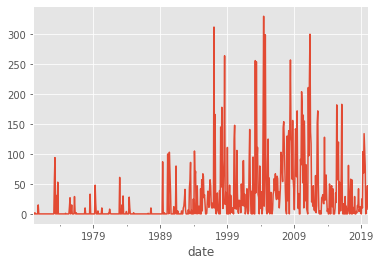

In [122]:
#4
ts_natdisasters.plot()
# Making a more attractive plot

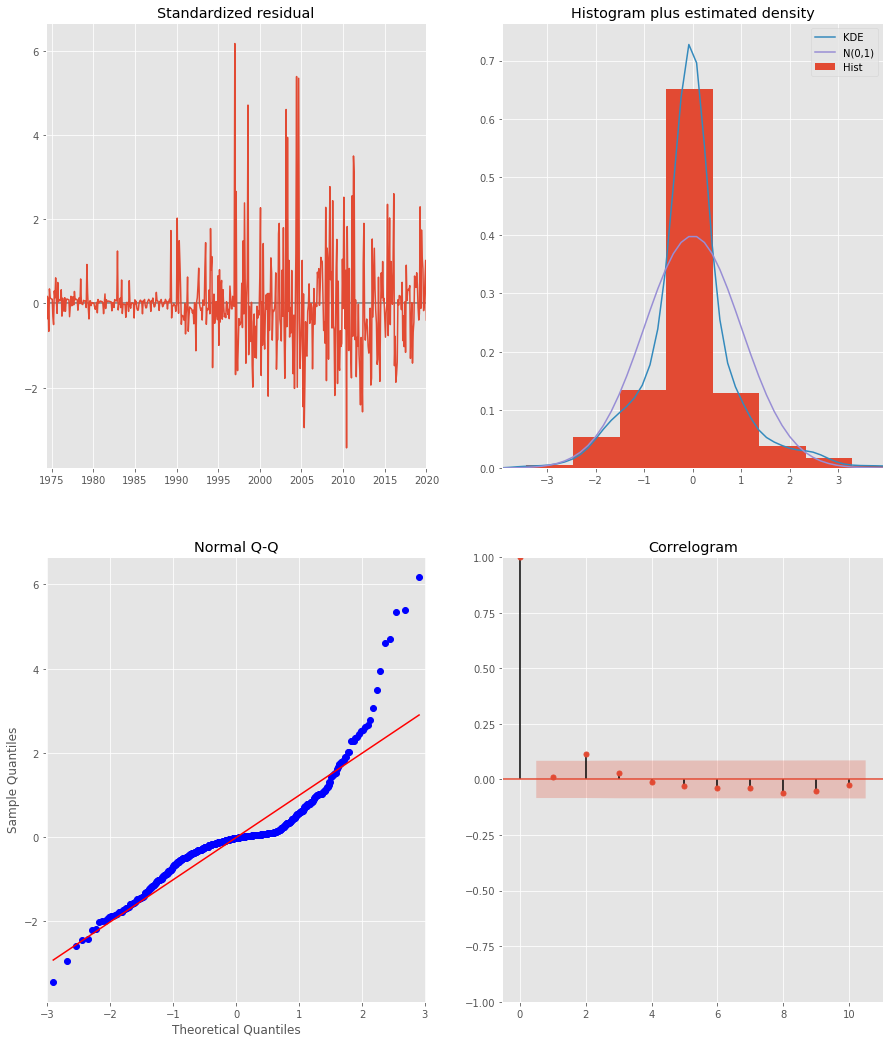

In [123]:
# 5 Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [124]:
# 6 Get predictions starting from 01-01-2010 and calculate confidence intervals
# Make more recent 
pred = output.get_prediction(start_date=('2017-01-01'), dynamic=False)
pred_conf = pred.conf_int()

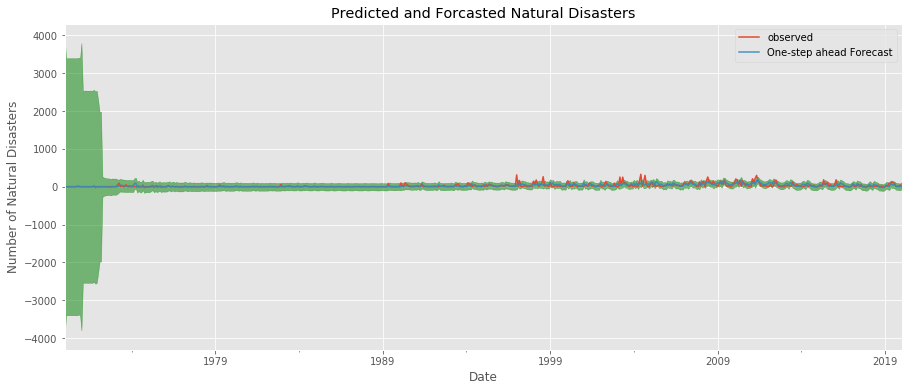

In [125]:
# 7 Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts_natdisasters.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Natural Disasters')
ax.legend()
ax.set_title('Predicted and Forcasted Natural Disasters')

plt.show()

In [126]:
# 8 Get the real and predicted values
natdisasters_forecasted = pred.predicted_mean
natdisasters_truth = ts_natdisasters['2017-01-01':]

# Compute the mean square error
mse = ((natdisasters_forecasted - natdisasters_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1313.87


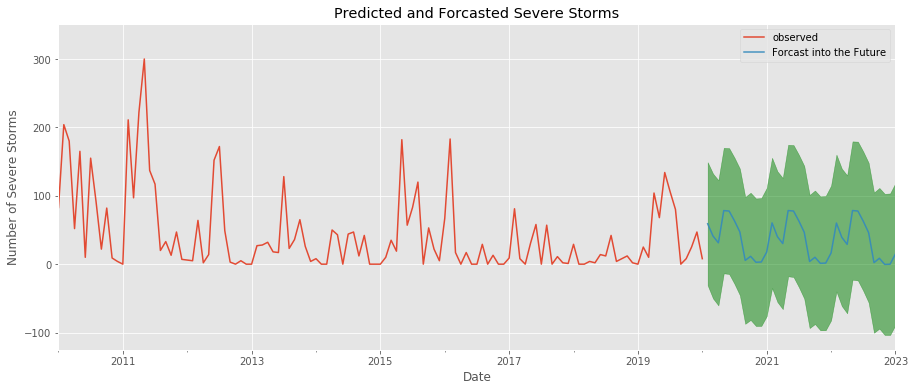

In [127]:
# 9 Forecast 2-3 years, by month
pred = output.get_forecast(steps=36)
pred_conf = pred.conf_int()

# Plot observed values
ax = ts_natdisasters.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Forcast into the Future', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Severe Storms')
ax.legend()
ax.set_title('Predicted and Forcasted Severe Storms')
ax.set_xlim('2010', '2023')

plt.show()

In [128]:
# 9 Forecast 2-3 years, by month
def plot_prediction(pred, ts_natdisasters, forecast_label = 'prediction'):
    
    pred_conf = pred.conf_int()

    # Plot observed values
    ax = ts_natdisasters.plot(label='observed')

    # Plot predicted values
    pred.predicted_mean.plot(ax=ax, label=forecast_label, alpha=0.9)

    # Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=0.5)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Natural Disasters')
    ax.legend()
    ax.set_title('Predicted and Forcasted Severe Storms')
    
    fig = ax.get_figure()

    plt.show()
    return fig,ax

In [129]:
# 10 Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

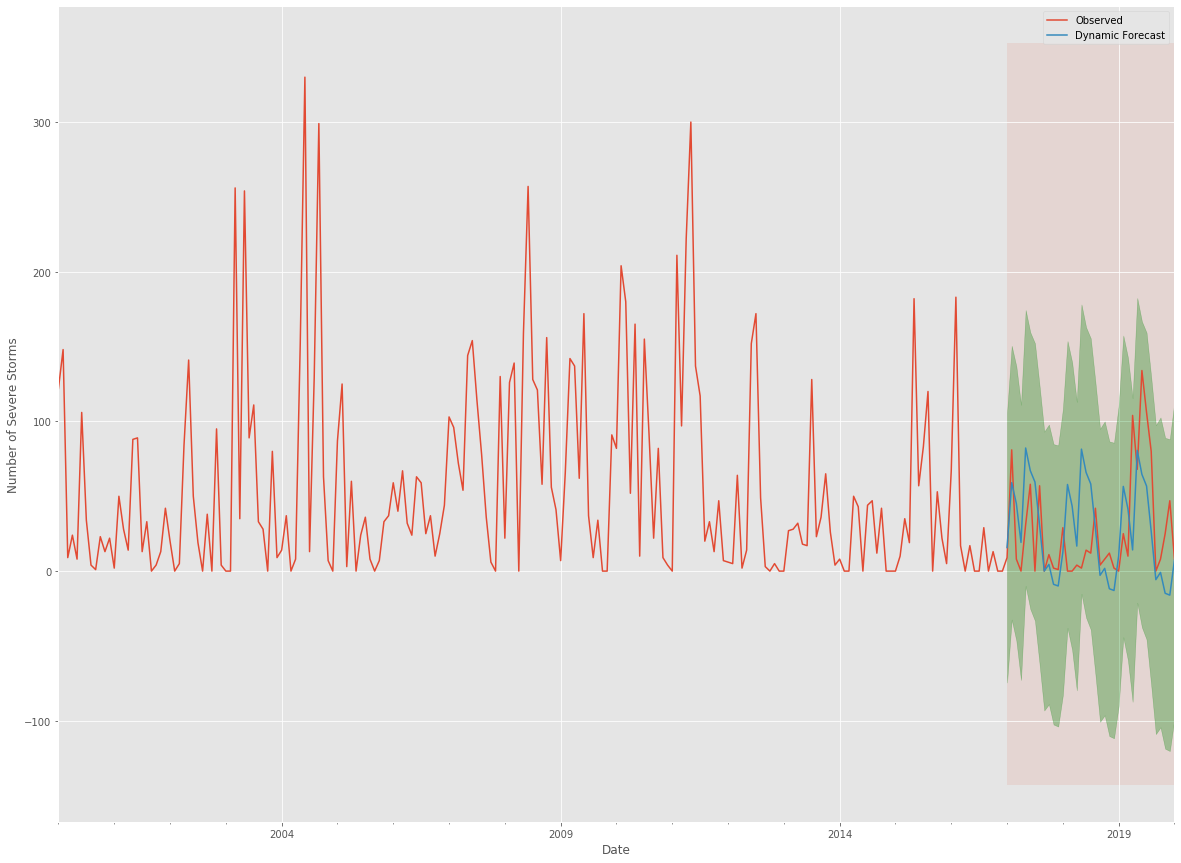

In [130]:
# 11 Plot the dynamic forecast with confidence intervals.

ax = ts_natdisasters['2000':].plot(label='Observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), natdisasters_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Severe Storms')

plt.legend()
plt.show()

In [131]:
# 12 Extract the predicted and true values of our time series
natdisasters_forecasted = pred_dynamic.predicted_mean
natdisasters_truth = ts_natdisasters['2017-01-01':]

# Compute the mean square error
mse = ((natdisasters_forecasted - natdisasters_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1444.1


In [132]:
# 13 Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

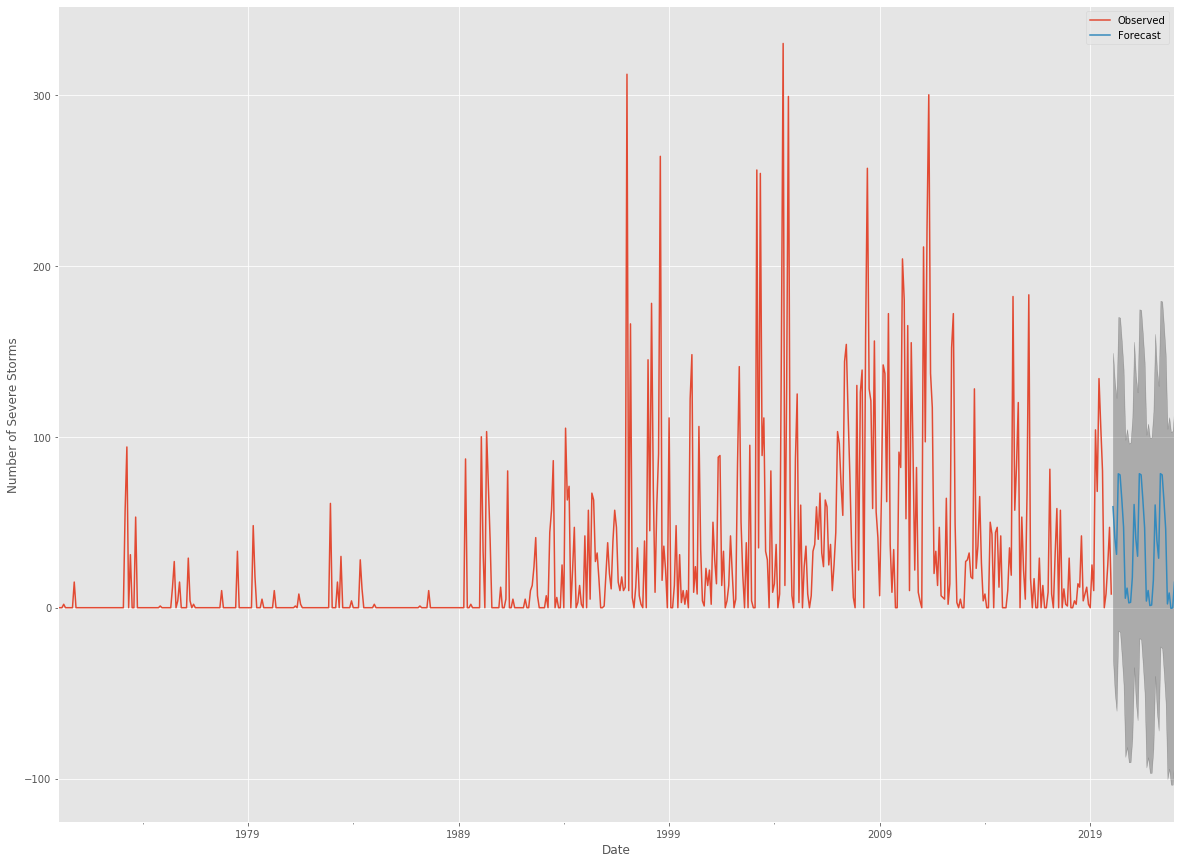

In [133]:
# 14 Plot future predictions with confidence intervals
ax = ts_natdisasters.plot(label='Observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Severe Storms')

plt.legend()
plt.show()

In [134]:
predicted_ss = prediction.predicted_mean

In [135]:
ss = pd.DataFrame({"severe storms":predicted_ss})

In [136]:
ss.to_csv('SS.csv')

In [137]:
ss.head(5)

,severe storms
2020-02-01,59.067
2020-03-01,41.094
2020-04-01,31.199
2020-05-01,78.327
2020-06-01,77.666


In [138]:
ss.index

DatetimeIndex(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [139]:
nat_dis = pd.read_csv('Nat_Disasters - SS.csv', parse_dates=['Unnamed: 0'])
nat_dis.rename({'Unnamed: 0':'Date'}, axis=1, inplace=True)
# nat_dis.set_index('Date', inplace=True)

In [140]:
nat_dis.head(5)

,Date,severe storms,hurricanes,floods
0,2020-02-01,59.067,-11.776,18.906
1,2020-03-01,41.094,-13.992,50.638
2,2020-04-01,31.199,-17.783,51.653
3,2020-05-01,78.327,-19.997,65.775
4,2020-06-01,77.666,-22.852,63.918


In [141]:
nat_dis.dtypes

Date             datetime64[ns]
severe storms           float64
hurricanes              float64
floods                  float64
dtype: object

In [142]:
nat_dis['Year'] = nat_dis['Date'].dt.year 
nat_dis

,Date,severe storms,hurricanes,floods,Year
0,2020-02-01,59.067,-11.776,18.906,2020
1,2020-03-01,41.094,-13.992,50.638,2020
2,2020-04-01,31.199,-17.783,51.653,2020
3,2020-05-01,78.327,-19.997,65.775,2020
4,2020-06-01,77.666,-22.852,63.918,2020
5,2020-07-01,63.378,-26.975,23.186,2020
6,2020-08-01,47.129,8.955,34.588,2020
7,2020-09-01,5.506,248.774,43.214,2020
8,2020-10-01,11.454,135.938,27.284,2020
9,2020-11-01,2.807,-28.515,20.331,2020


In [143]:
nat_dis.set_index('Date', inplace=True)

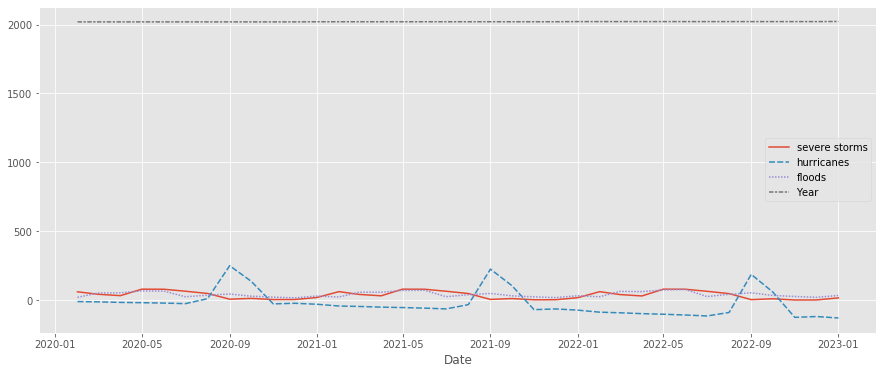

In [144]:
sns.lineplot(data=nat_dis, )

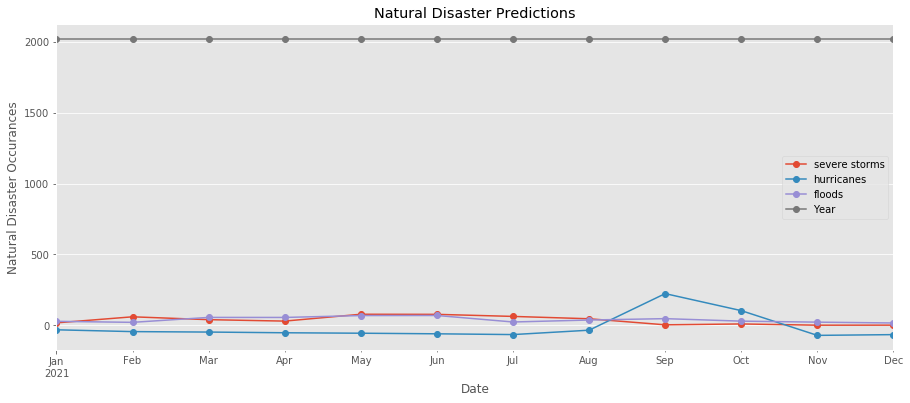

In [145]:
ax = nat_dis[nat_dis['Year']==2021].plot(marker='o')
ax.set_ylabel('Number of Natural Disasters') 
plt.xlabel("Date")
plt.ylabel("Natural Disaster Occurances")
plt.title('Natural Disaster Predictions')
plt.show()
# Time Series lesson #1 - use grouper object by year

In [146]:
# What things will or won't be happening in the near future
# Business case for budgetting for certain ones

# Hurricanes

In [147]:
#1
dfhurr = pd.read_csv(r"Best_Params_Hurr.csv")
dfhurr.head()

,Unnamed: 0,pdq,pdqs,aic
0,0,"(0, 0, 0)","(0, 0, 0, 12)",7707.807
1,1,"(0, 0, 0)","(0, 0, 1, 12)",7546.857
2,2,"(0, 0, 0)","(0, 0, 2, 12)",7405.942
3,3,"(0, 0, 0)","(0, 1, 0, 12)",7844.906
4,4,"(0, 0, 0)","(0, 1, 1, 12)",7405.512


In [148]:
ts_hurricane

date
1970-01-01     0.000
1970-02-01     0.000
1970-03-01     0.000
1970-04-01     0.000
1970-05-01     0.000
               ...  
2019-09-01   172.000
2019-10-01    42.000
2019-11-01     0.000
2019-12-01     0.000
2020-01-01     0.000
Freq: MS, Name: Hurricane, Length: 601, dtype: float64

In [149]:
dfhurr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
Unnamed: 0    729 non-null int64
pdq           729 non-null object
pdqs          729 non-null object
aic           729 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 22.9+ KB


In [150]:
ts_hurricane = df['Hurricane']
ts_hurricane

date
1970-01-01     0.000
1970-02-01     0.000
1970-03-01     0.000
1970-04-01     0.000
1970-05-01     0.000
               ...  
2019-09-01   172.000
2019-10-01    42.000
2019-11-01     0.000
2019-12-01     0.000
2020-01-01     0.000
Freq: MS, Name: Hurricane, Length: 601, dtype: float64

In [151]:
dfhurr

,Unnamed: 0,pdq,pdqs,aic
0,0,"(0, 0, 0)","(0, 0, 0, 12)",7707.807
1,1,"(0, 0, 0)","(0, 0, 1, 12)",7546.857
2,2,"(0, 0, 0)","(0, 0, 2, 12)",7405.942
3,3,"(0, 0, 0)","(0, 1, 0, 12)",7844.906
4,4,"(0, 0, 0)","(0, 1, 1, 12)",7405.512
...,...,...,...,...
724,724,"(2, 2, 2)","(2, 1, 1, 12)",7446.172
725,725,"(2, 2, 2)","(2, 1, 2, 12)",7431.003
726,726,"(2, 2, 2)","(2, 2, 0, 12)",7813.507
727,727,"(2, 2, 2)","(2, 2, 1, 12)",7765.098


In [152]:
#2 Find the parameters with minimal AIC value
dfhurr = pd.DataFrame(dfhurr, columns=['pdq', 'pdqs', 'aic'])
best_params = dict(dfhurr.loc[dfhurr['aic'].idxmin()])
best_params

{'pdq': '(0, 0, 2)', 'pdqs': '(1, 2, 2, 12)', 'aic': 7158.884371483791}

In [153]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_hurricane, 
                                        order=(0, 1, 2), 
                                        seasonal_order=(0, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Hurricane   No. Observations:                  601
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -3575.129
Date:                            Fri, 15 Jan 2021   AIC                           7160.257
Time:                                    10:29:40   BIC                           7181.798
Sample:                                01-01-1970   HQIC                          7168.675
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9517      0.053    -17.948      0.000      -1.056      -0.848
ma.L2         -0.0588      0.035     -1.685      0.092      -0.127       0.010
ma.S.L12      -1.9984      0.034    -59.614      0.000      -2.064      -1.933
ma.S.L24       1.0001      0.033     30.278      0.000       0.935       1.065
sigma2      2.085e+04   3.19e-06   6.54e+09      0.000    2.09e+04    2.09e+04
===================================================================================
Ljung-Box (Q):                       11.94   Jarque-Bera (JB):           2349430.74
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             883.83   Skew:                            15.55
Prob(H) (two-sided):                  0.00   Kurtosis:                       321.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.57e+24. Standard errors may be unstable.
"""

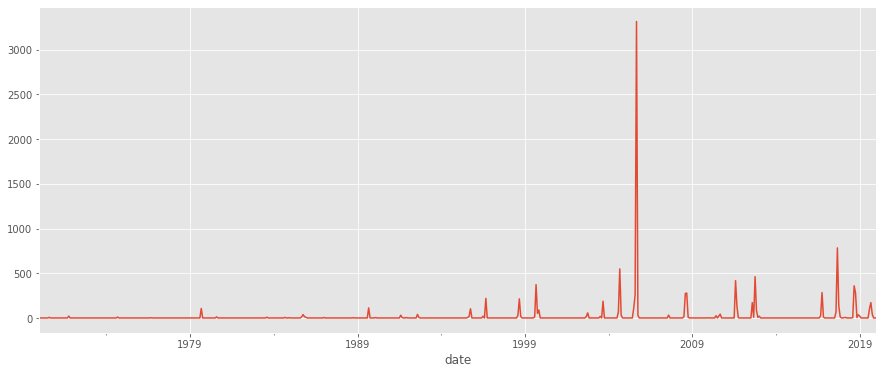

In [154]:
#4
ts_hurricane.plot()

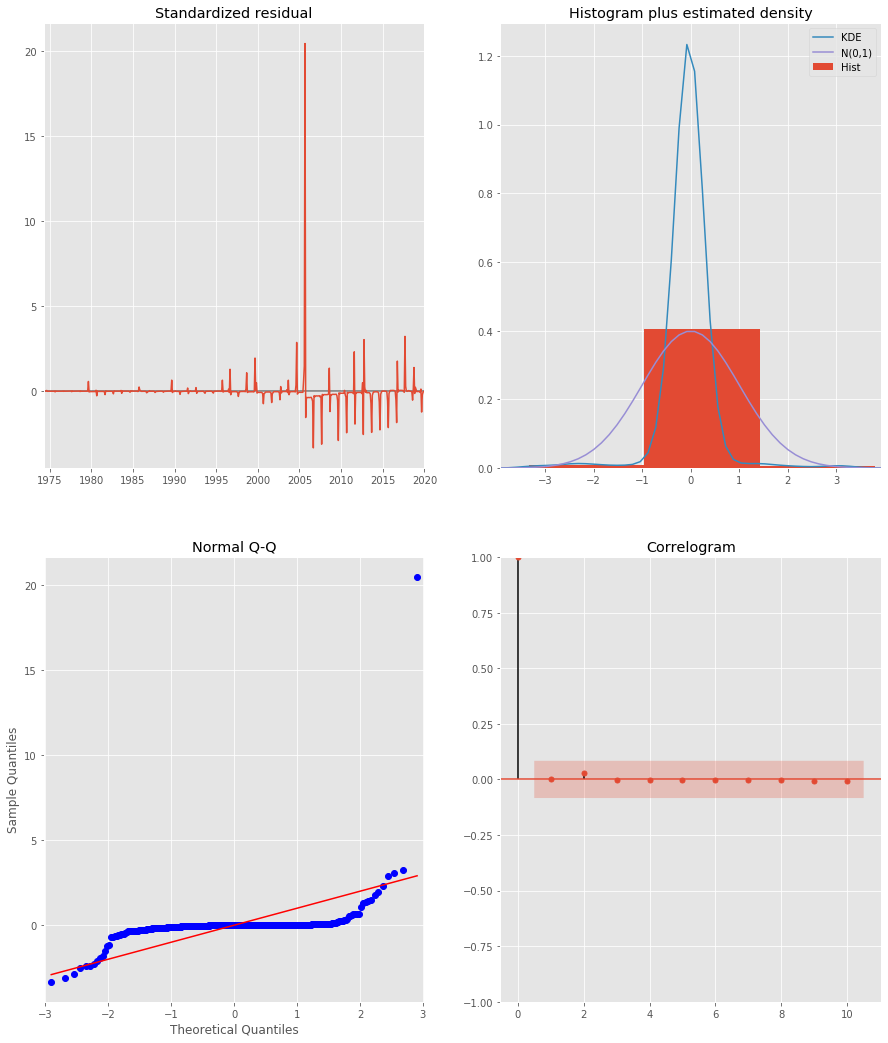

In [155]:
#5 Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [156]:
# 6 Get predictions starting from 01-01-2010 and calculate confidence intervals
# Make more recent 
pred = output.get_prediction(start_date=('2017-01-01'), dynamic=False)
pred_conf = pred.conf_int()

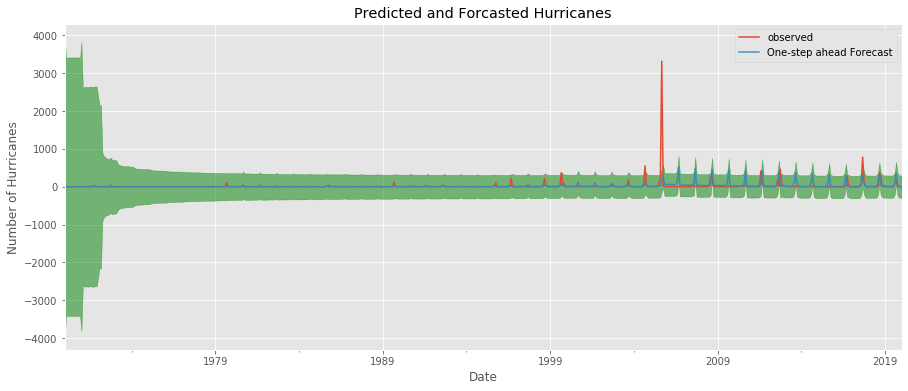

In [157]:
# 7 Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts_hurricane.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Hurricanes')
ax.legend()
ax.set_title('Predicted and Forcasted Hurricanes')

plt.show()

In [158]:
# 8 Get the real and predicted values
ts_hurricane_forcasted = pred.predicted_mean
ts_hurricane_truth = ts_hurricane['2017-01-01':]

# Compute the mean square error
mse = ((ts_hurricane_forcasted - ts_hurricane_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 8856.54


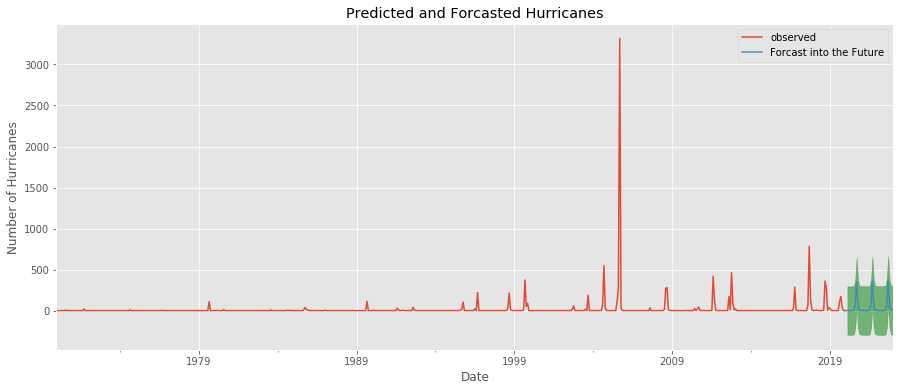

In [159]:
# 9 Forecast 2-3 years, by month
pred = output.get_forecast(steps=36)
pred_conf = pred.conf_int()

# Plot observed values
ax = ts_hurricane.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Forcast into the Future', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Hurricanes')
ax.legend()
ax.set_title('Predicted and Forcasted Hurricanes')

plt.show()

In [160]:
# 10 Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

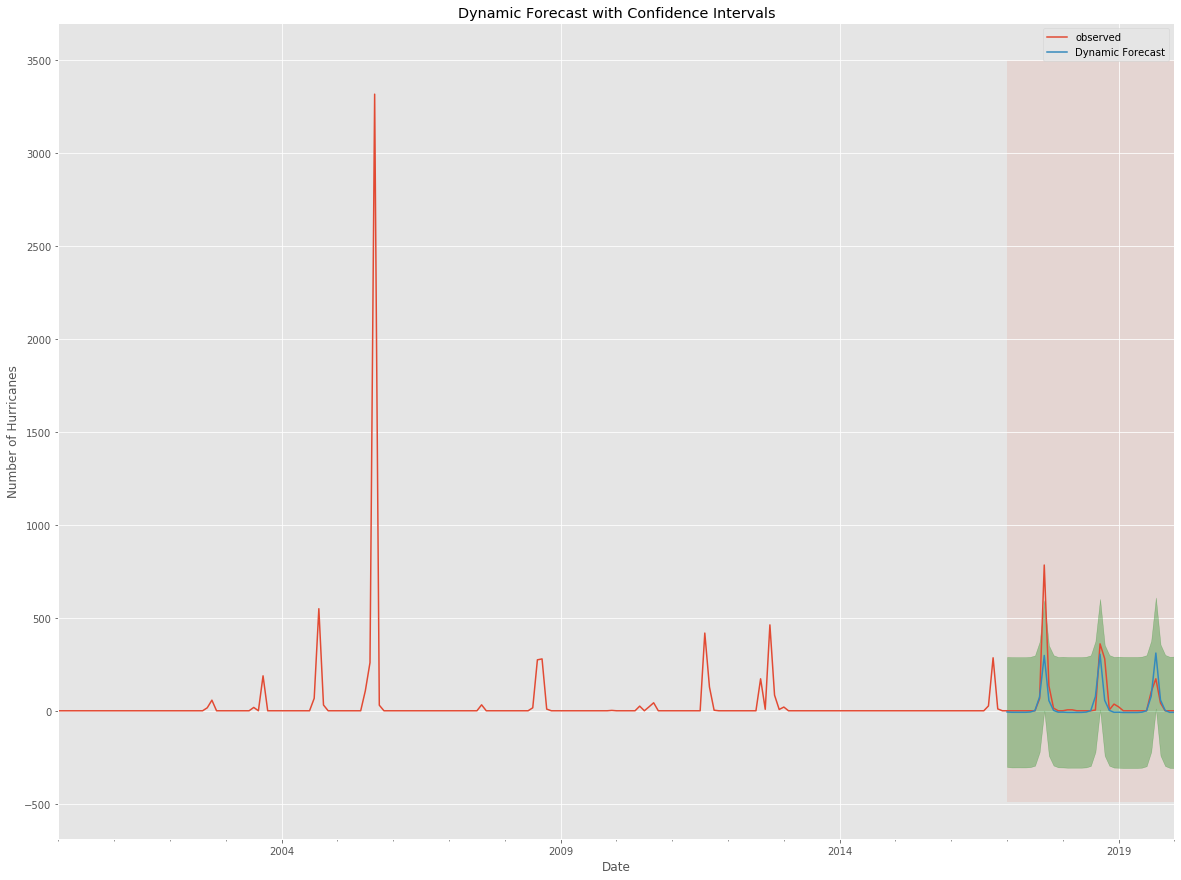

In [161]:
# 11 Plot the dynamic forecast with confidence intervals.

ax = ts_hurricane['2000':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), ts_hurricane_forcasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Hurricanes')
plt.title('Dynamic Forecast with Confidence Intervals')

plt.legend()
plt.show()

In [162]:
# 12 Extract the predicted and true values of our time series
hurricanes_forecasted = pred_dynamic.predicted_mean
hurricanes_truth = ts_hurricane['2017-01-01':]

# Compute the mean square error
mse = ((hurricanes_forecasted - hurricanes_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 8809.25


In [163]:
# 13 Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

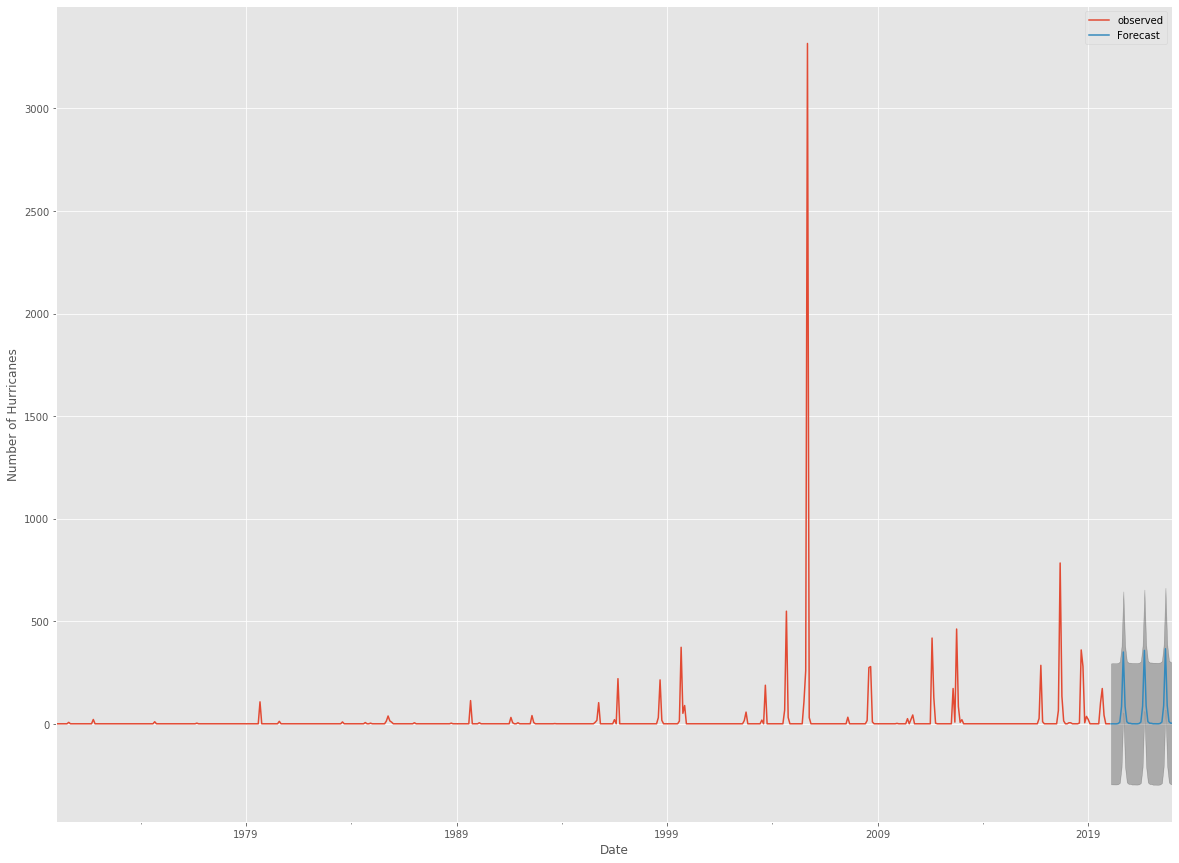

In [164]:
# 14 Plot future predictions with confidence intervals
ax = ts_hurricane.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Hurricanes')

plt.legend()
plt.show()

In [165]:
predicted_hurr = prediction.predicted_mean

In [166]:
hurr = pd.DataFrame({"hurricanes":predicted_hurr})

In [167]:
hurr.to_csv('hurr.csv')

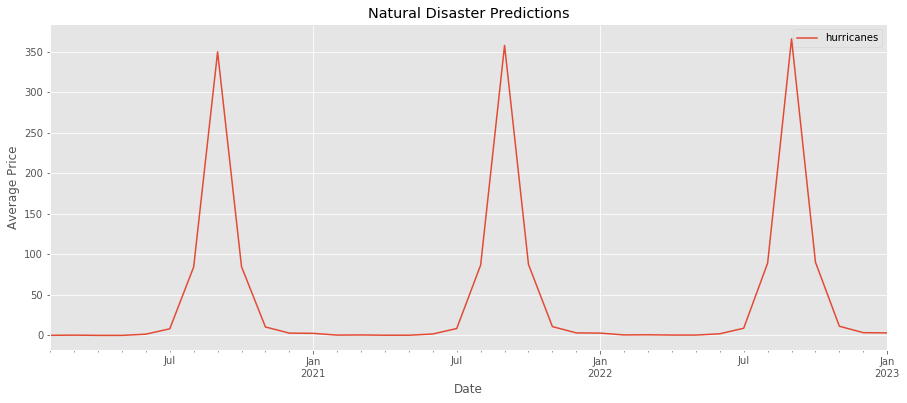

In [168]:
ax = hurr.plot()
ax.set_ylabel('Number of Natural Disasters') 
plt.xlabel("Date")
plt.ylabel("Hurricanes")
plt.title('Natural Disaster Predictions')
plt.show()

# Floods

In [169]:
# 1
dffloods = pd.read_csv(r"Best_Params_Floods.csv")
dffloods.head()

,Unnamed: 0,pdq,pdqs,aic
0,0,"(0, 0, 0)","(0, 0, 0, 12)",6059.660
1,1,"(0, 0, 0)","(0, 0, 1, 12)",5931.128
2,2,"(0, 0, 0)","(0, 0, 2, 12)",5800.998
3,3,"(0, 0, 0)","(0, 1, 0, 12)",6201.743
4,4,"(0, 0, 0)","(0, 1, 1, 12)",5743.467


In [170]:
# 2 Find the parameters with minimal AIC value
dffloods = pd.DataFrame(dffloods, columns=['pdq', 'pdqs', 'aic'])
best_params = dict(dffloods.loc[dffloods['aic'].idxmin()])
best_params

{'pdq': '(0, 1, 2)', 'pdqs': '(0, 2, 2, 12)', 'aic': 5503.951904364711}

In [171]:
#3 ... is the optimal parameter values that we will now use for our SARIMAX model

ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_floods, 
                                        order=(0, 1, 2), 
                                        seasonal_order=(0, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Flood   No. Observations:                  601
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -2746.976
Date:                            Fri, 15 Jan 2021   AIC                           5503.952
Time:                                    10:30:10   BIC                           5525.492
Sample:                                01-01-1970   HQIC                          5512.370
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9784      0.049    -19.851      0.000      -1.075      -0.882
ma.L2         -0.0721      0.040     -1.782      0.075      -0.151       0.007
ma.S.L12      -1.9040      0.036    -52.947      0.000      -1.974      -1.834
ma.S.L24       0.9176      0.035     25.944      0.000       0.848       0.987
sigma2      1055.4588     41.137     25.657      0.000     974.832    1136.086
===================================================================================
Ljung-Box (Q):                       53.62   Jarque-Bera (JB):             20032.34
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             3.65
Prob(H) (two-sided):                  0.14   Kurtosis:                        31.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

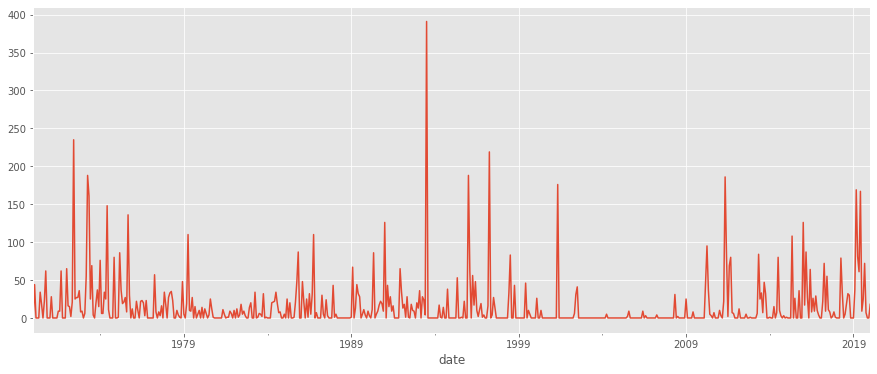

In [172]:
#4 
ts_floods.plot()

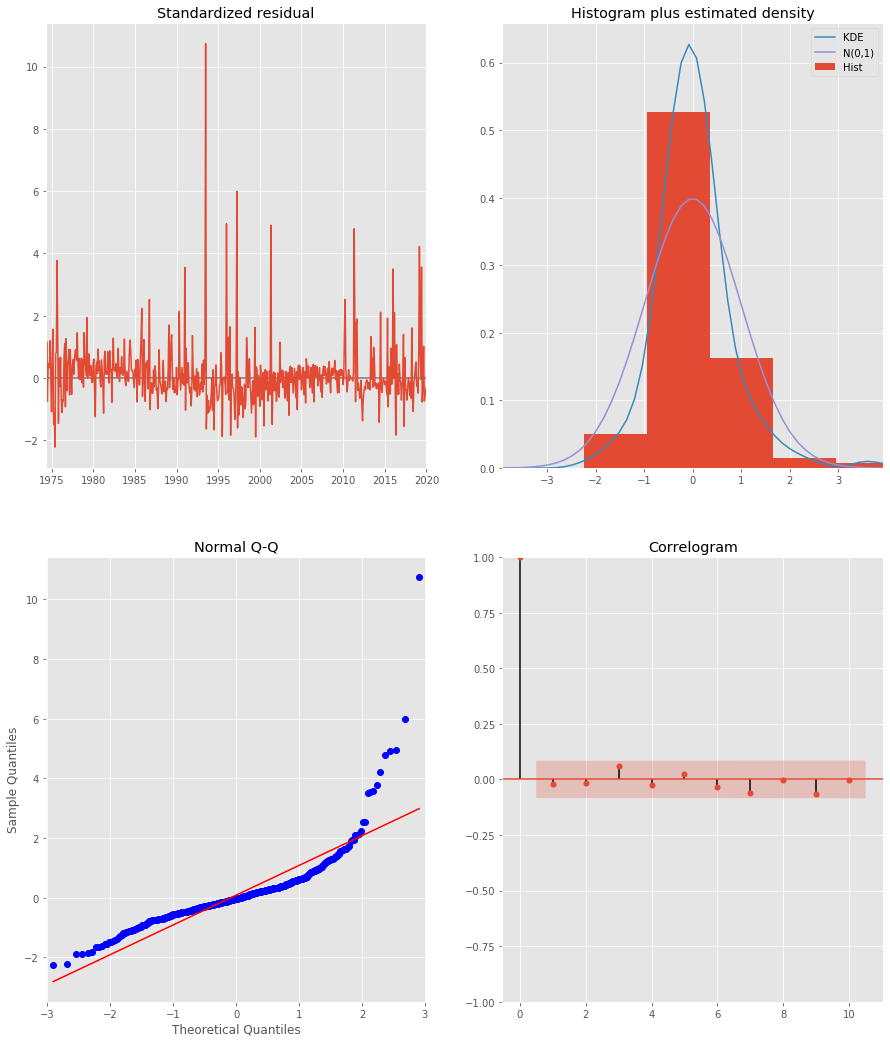

In [173]:
#5 Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [174]:
#6 Get predictions starting from 01-01-2010 and calculate confidence intervals
# Make more recent 
pred = output.get_prediction(start_date=('2017-01-01'), dynamic=False)
pred_conf = pred.conf_int()

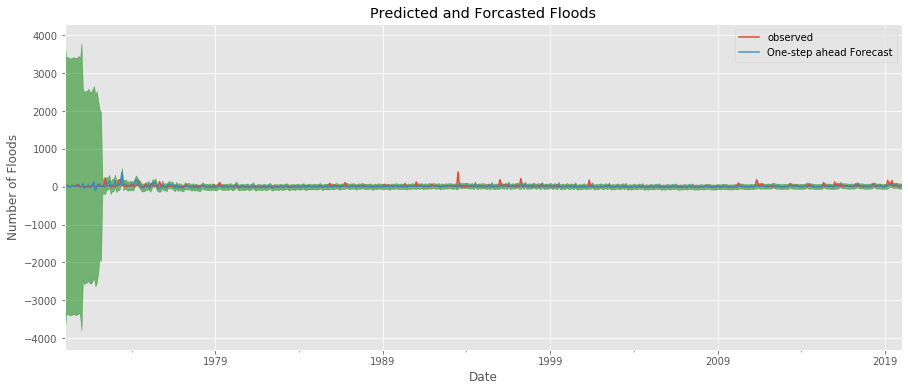

In [175]:
#7 Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts_floods.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Floods')
ax.legend()
ax.set_title('Predicted and Forcasted Floods')

plt.show()

In [176]:
dffloods

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",6059.660
1,"(0, 0, 0)","(0, 0, 1, 12)",5931.128
2,"(0, 0, 0)","(0, 0, 2, 12)",5800.998
3,"(0, 0, 0)","(0, 1, 0, 12)",6201.743
4,"(0, 0, 0)","(0, 1, 1, 12)",5743.467
...,...,...,...
724,"(2, 2, 2)","(2, 1, 1, 12)",5816.096
725,"(2, 2, 2)","(2, 1, 2, 12)",5798.277
726,"(2, 2, 2)","(2, 2, 0, 12)",6246.021
727,"(2, 2, 2)","(2, 2, 1, 12)",6196.717


In [177]:
#8 Get the real and predicted values
ts_floods_forcasted = pred.predicted_mean
ts_floods_truth = ts_floods.loc['2017-01-01':]

# Compute the mean square error
mse = ((ts_floods_forcasted - ts_floods_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1482.85


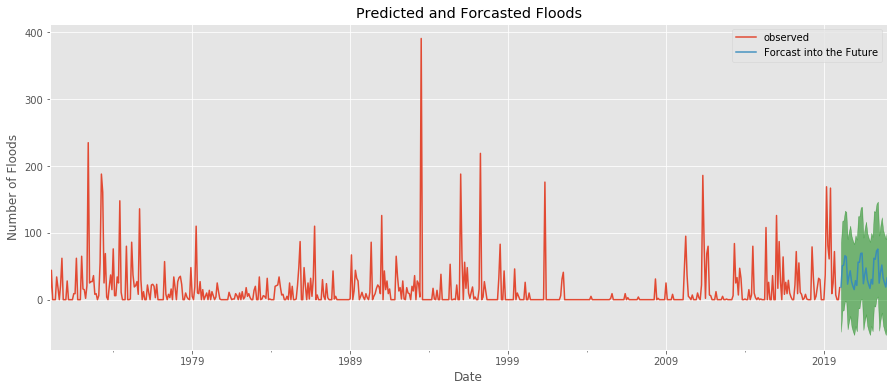

In [178]:
# 9 Forecast 2-3 years, by month
pred = output.get_forecast(steps=36)
pred_conf = pred.conf_int()

# Plot observed values
ax = ts_floods.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Forcast into the Future', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Number of Floods')
ax.legend()
ax.set_title('Predicted and Forcasted Floods')

plt.show()
# Change to certain time frame of viewing

In [179]:
# 10 Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

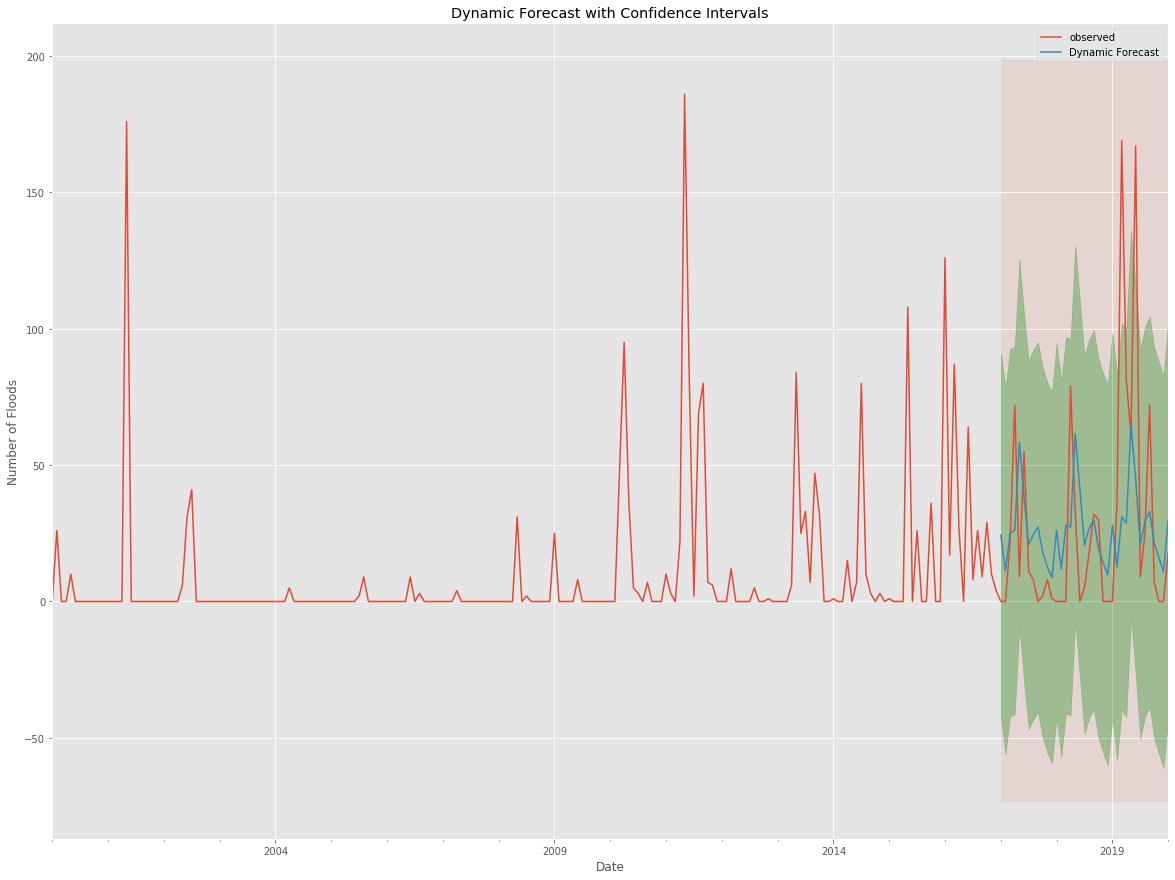

In [180]:
# 11 Plot the dynamic forecast with confidence intervals.

ax = ts_floods['2000':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), ts_floods_forcasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Floods')
plt.title('Dynamic Forecast with Confidence Intervals')


plt.legend()
plt.show()

In [181]:
# 12 Extract the predicted and true values of our time series
ts_floods_forcasted = pred_dynamic.predicted_mean
ts_floods_truth = ts_floods['2017-01-01':]

# Compute the mean square error
mse = ((ts_floods_forcasted - ts_floods_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1487.77


In [182]:
# 13 Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

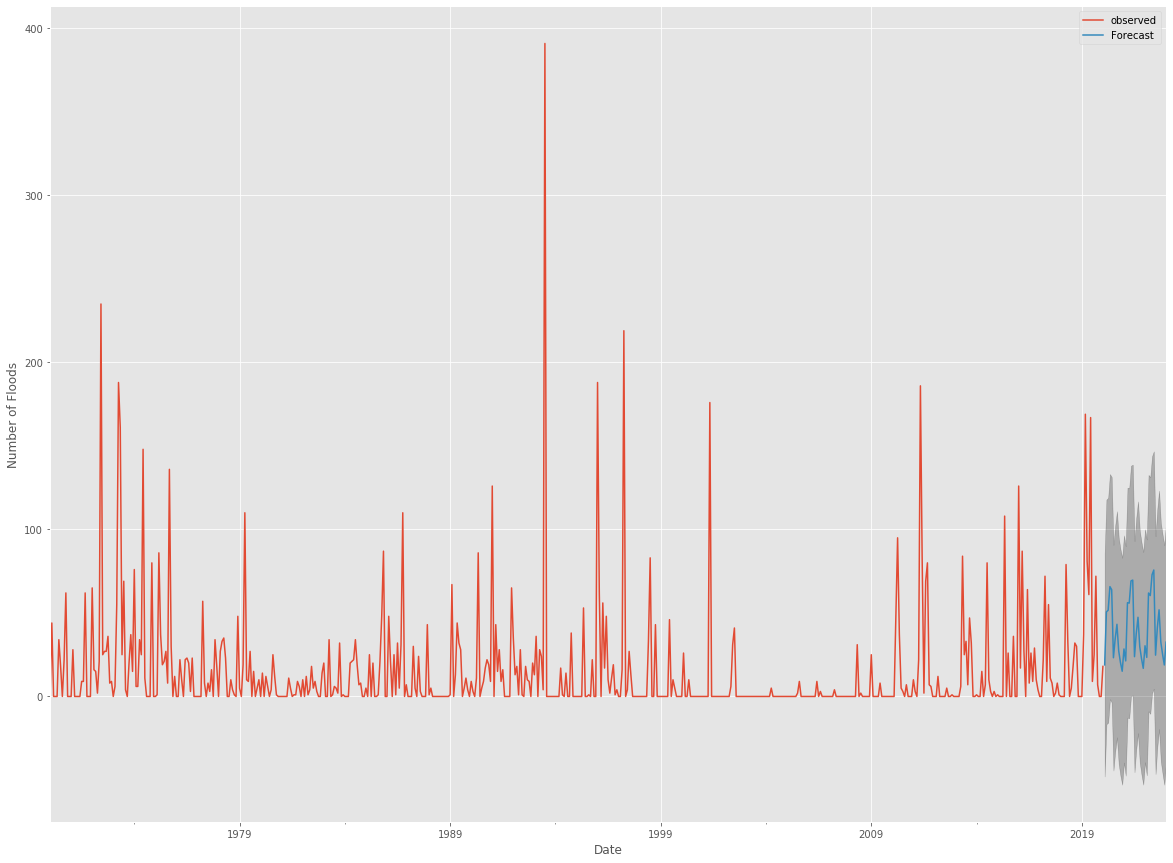

In [183]:
# 14 Plot future predictions with confidence intervals
ax = ts_floods.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Floods')

plt.legend()
plt.show()

In [184]:
predicted_floods = prediction.predicted_mean

In [185]:
floods = pd.DataFrame({"floods":predicted_floods})

In [186]:
floods.to_csv('floods.csv')

# Conclusions

We have now prepared our data and additionally created three seperate dataframes for the top three natural disasters that occur in the U.S.

Now, continue on to the next three notebooks to see modeling done for each natural disaster.

- [Severe Storms](https://github.com/rachelbeery/dsc-phase-4-project/blob/main/FEMA_Severe_Storms.ipynb)
- [Hurricanes](https://github.com/rachelbeery/dsc-phase-4-project/blob/main/FEMA_Hurricanes.ipynb)
- [Floods](https://github.com/rachelbeery/dsc-phase-4-project/blob/main/FEMA_Floods.ipynb)